In [25]:
import os


import torch
import IPython
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt


from models.pl_model import MelGAN

In [33]:
model = MelGAN.load_from_checkpoint("/home/nsw0311/nas_storage/ckpt/melgan_24000/epoch=1999.ckpt")
# model = MelGAN.load_from_checkpoint("/home/nsw0311/nas_storage/ckpt/melgan_ine_24000/epoch=1999.ckpt")
model.generator.remove_weight_norm()
model = model.eval()

In [34]:
# path = "/home/nsw0311/nas_storage/datasets/tts/processed_data/ine/0090.pt"
rate = 24000

path = "/home/nsw0311/nas_storage/datasets/tts/processed_data_24000/ine/0115.pt"
sample = torch.load(path)

wave = sample["waveform"]
spectrogram = sample["mel_spectrogram"]
text = sample['text']

In [35]:
IPython.display.Audio(wave, rate=rate)

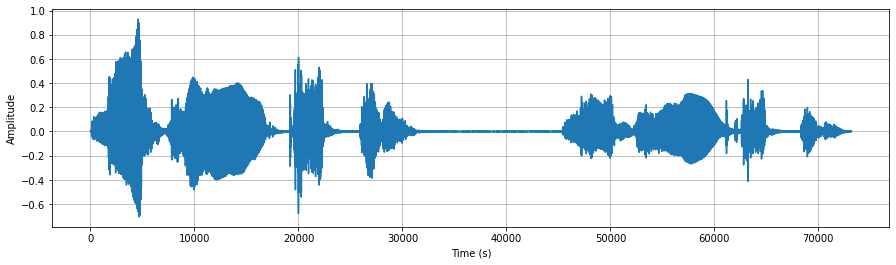

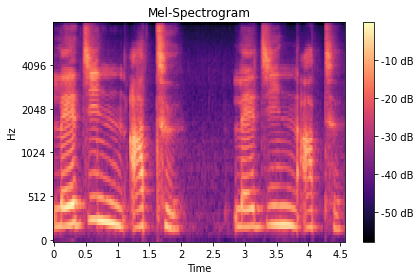

In [36]:
plt.figure(figsize=(15, 4))
plt.grid()
plt.plot(wave)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

librosa.display.specshow(
    librosa.power_to_db(spectrogram, ref=np.max), 
    y_axis='mel', 
    sr=16000, 
    hop_length=256, 
    x_axis='time'
)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.tight_layout()
plt.show()

In [37]:
with torch.no_grad():
    output = model.generator(spectrogram.unsqueeze(0))[0, 0]

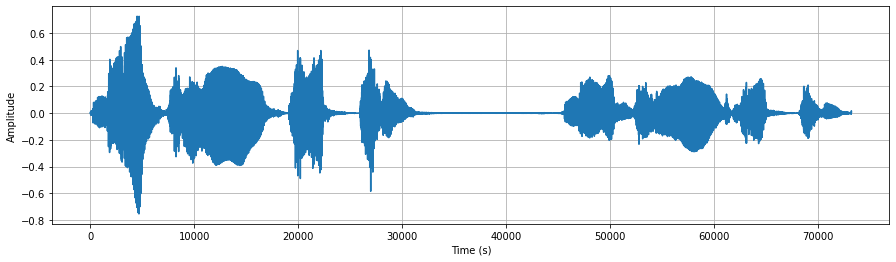

In [38]:
plt.figure(figsize=(15, 4))
plt.grid()
plt.plot(output.numpy())
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [39]:
IPython.display.Audio(output, rate=rate)